# Tabular data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment9/tabular_data.ipynb)





In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest

  # Step 1: Data Loading and Initial Exploration

  First, let's load the dataset and get a sense of its structure, columns, and initial statistics.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/DataMining/World_poverty.csv')
df.head()

,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline,...,decile8_thr,decile9_thr,gini,mld,polarization,palma_ratio,s80_s20_ratio,p90_p10_ratio,p90_p50_ratio,p50_p10_ratio
0,Albania,1996,national,consumption,2011,1996.0,0.0,0.920669,11.174149,44.618417,...,8.85,10.92,0.270103,0.119104,0.241293,0.928335,3.945872,3.568627,1.889273,1.888889
1,Albania,2002,national,consumption,2011,2002.0,1.0,1.570843,14.132118,49.669635,...,8.83,11.58,0.317390,0.164812,0.268982,1.215056,4.831625,3.979381,2.090253,1.903780
2,Albania,2005,national,consumption,2011,2005.0,1.0,0.860527,8.715685,38.545254,...,10.02,12.78,0.305957,0.154413,0.254529,1.142718,4.662236,3.872727,1.978328,1.957576
3,Albania,2008,national,consumption,2011,2008.0,1.0,0.313650,5.250542,31.110345,...,10.74,13.62,0.299847,0.148893,0.247311,1.114657,4.395911,3.574803,1.956897,1.826772
4,Albania,2012,national,consumption,2011,2012.0,1.0,0.849754,6.182414,34.528906,...,10.52,13.26,0.289605,0.138417,0.249988,1.041193,4.272573,3.632877,1.941435,1.871233


### Brief overview of the dataset:

* country: The country name.

* year: The year of the data point.

* reporting_level: Indicates the level at which the data is reported (e.g., national).

* welfare_type: Type of welfare considered (e.g., consumption).

* ppp_version: Purchasing power parity version.

* survey_year: The year the survey was conducted.

* survey_comparability: A score indicating the comparability of the survey.

... and many more columns related to poverty indicators, economic statistics, and distribution ratios.

  # Step 2: Data Cleaning and Processing
In this step, we will:

* Check for missing values.
* Handle any missing values based on the nature of the data and the columns affected.
* Check for any duplicate rows.

In [ ]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

reporting_level                              466
welfare_type                                 466
survey_year                                  466
survey_comparability                         466
headcount_ratio_40_median                    466
headcount_ratio_50_median                    466
headcount_ratio_60_median                    466
headcount_40_median                          466
headcount_50_median                          466
headcount_60_median                          466
avg_shortfall_international_povline          291
avg_shortfall_lower_mid_income_povline       100
avg_shortfall_upper_mid_income_povline        12
avg_shortfall_100                            750
avg_shortfall_1000                             6
avg_shortfall_40_median                      468
avg_shortfall_50_median                      466
avg_shortfall_60_median                      466
total_shortfall_40_median                    466
total_shortfall_50_median                    466
total_shortfall_60_m

### Several columns in the dataset have missing values.
### Here's a summary:

1. Columns such as reporting_level, welfare_type, survey_year, and survey_comparability have 466 missing values each.

2. Some poverty-related metrics, like avg_shortfall_international_povline and income_gap_ratio_international_povline, also have missing values, but in varying counts.

3. There are several columns related to income distribution (e.g., decile1_avg, decile2_avg) that have missing values, around 482 each.

4. Economic inequality metrics like gini, mld, and polarization have around 476 missing values each.

### Handling Missing Values:

1. For categorical columns like reporting_level and welfare_type, we could fill in the missing values with a placeholder like "Unknown".
2. For numerical columns, we can either:
  * Fill missing values with the median or mean of the column.
  * Use interpolation techniques.
  * Drop rows with missing values.

In [ ]:
categorical_cols = ['reporting_level', 'welfare_type']
df[categorical_cols] = df[categorical_cols].fillna("Unknown")
numerical_cols_with_missing = df.columns[df.isnull().any()].tolist()
df[numerical_cols_with_missing] = df[numerical_cols_with_missing].apply(lambda col: col.fillna(col.median()), axis=0)


In [ ]:
# Fill missing values for categorical columns with "Unknown"
categorical_cols = ['reporting_level', 'welfare_type']
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

# Fill missing values for numerical columns with their median
numerical_cols_with_missing = missing_values[missing_values > 0].index.drop(categorical_cols)
df[numerical_cols_with_missing] = df[numerical_cols_with_missing].apply(lambda col: col.fillna(col.median()), axis=0)


In [ ]:
remaining_missing = df.isnull().sum().sum()
remaining_missing

0

Now, let's proceed to check for duplicate rows in the dataset.​

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows


0

  # Step 3: Basic Data Statistics
Before we dive into feature processing and selection, it's beneficial to get a general sense of the data's distribution and statistics. Let's compute some basic statistics for the dataset.​

In [ ]:
# Compute basic statistics for the dataset
basic_stats = df.describe(include='all')

# Display basic statistics for a subset of columns for brevity
basic_stats.iloc[:, :10]  # Displaying only the first 10 columns for brevity


,country,year,reporting_level,welfare_type,ppp_version,survey_year,survey_comparability,headcount_ratio_international_povline,headcount_ratio_lower_mid_income_povline,headcount_ratio_upper_mid_income_povline
count,4877,4877.000000,4877,4877,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000,4877.000000
unique,177,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN
top,Indonesia,NaN,national,income,NaN,NaN,NaN,NaN,NaN,NaN
freq,174,NaN,4049,2464,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2005.759893,NaN,NaN,2013.999385,2006.041189,1.578019,11.081565,21.672687,36.538818
std,NaN,9.438782,NaN,NaN,3.000308,9.037368,1.347343,18.190433,27.104145,33.674140
min,NaN,1967.000000,NaN,NaN,2011.000000,1967.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,2000.000000,NaN,NaN,2011.000000,2001.000000,1.000000,0.278387,0.807877,3.032081
50%,NaN,2007.000000,NaN,NaN,2011.000000,2007.000000,1.000000,2.041412,9.186717,28.582685
75%,NaN,2013.000000,NaN,NaN,2017.000000,2013.000000,2.000000,13.390963,34.166712,64.864719


Here are some basic statistics for the first Seven columns of the dataset:

1. country: There are 177 unique countries in the dataset. For instance, Indonesia has the highest frequency with 174 occurrences.

2. year: The data spans from 1967 to 2021.

3. reporting_level: Most data points are reported at the 'national' level.

4. welfare_type: The most common welfare type in the dataset is 'income'.

5. ppp_version: There seem to be two main versions: 2011 and 2017.

6. survey_year: Similar to the year column, the survey years span from 1967 to 2021.

7. headcount_ratio_international_povline: This metric, which indicates the percentage of the population living below the international poverty line, has a mean of about 11.08% with a standard deviation of 18.19%.

  # Step 4: Feature Processing and Selection
Given the number of features in the dataset, we'll:

Analyze the correlation of features with each other to identify any multicollinearity.

Based on the correlation, decide on which features to retain or remove.

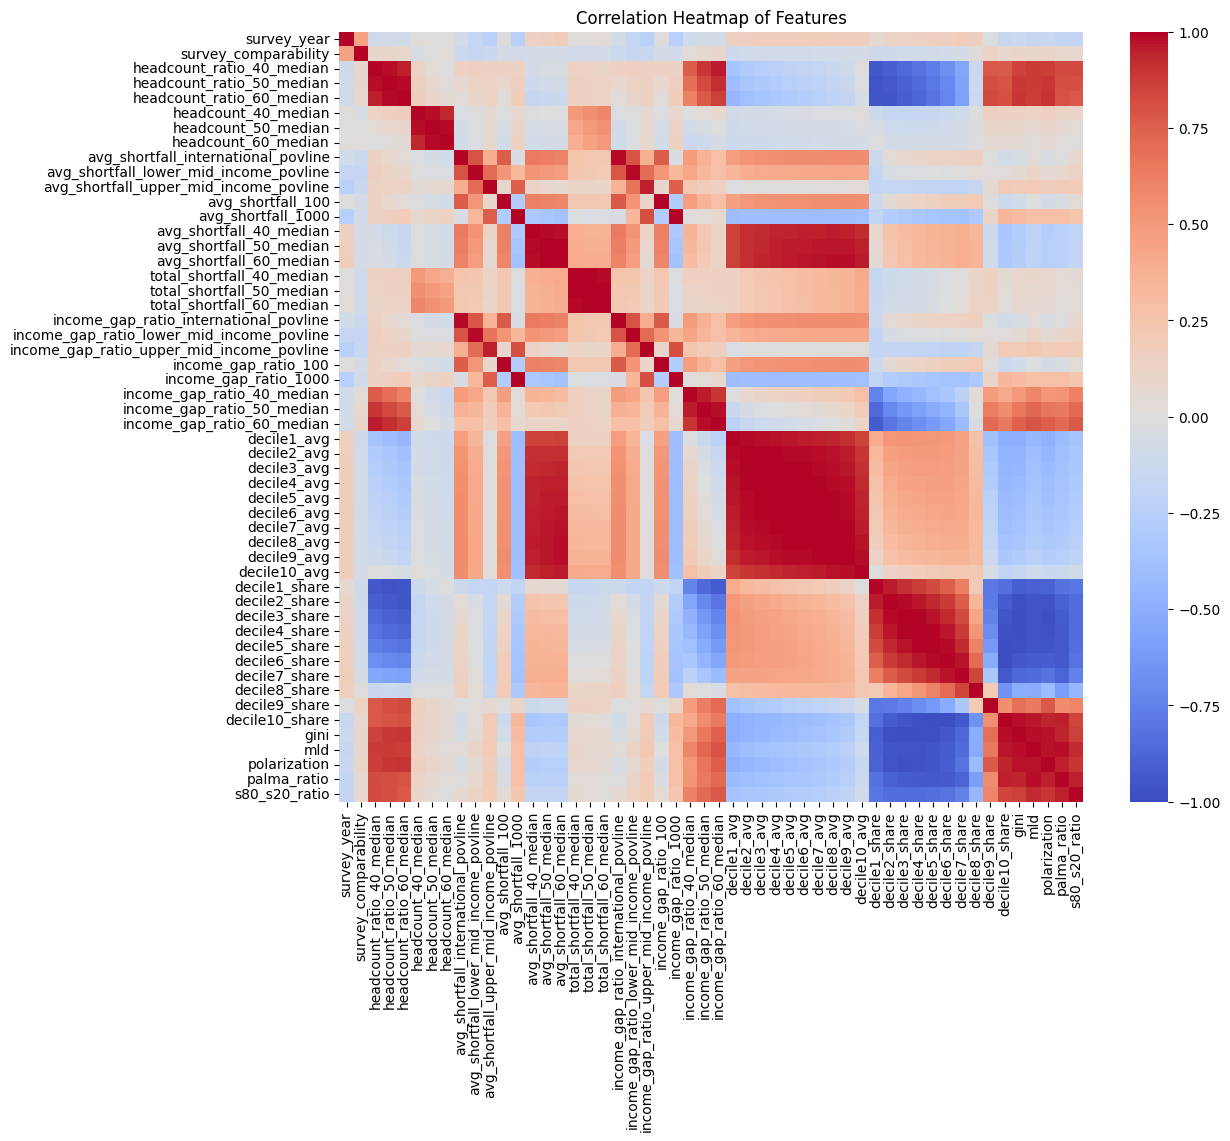

In [ ]:
# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_cols_with_missing].corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Features")
plt.show()

The correlation heatmap provides a visual representation of how different features in the dataset relate to each other.

From the heatmap:

Dark blue regions indicate strong negative correlations.

Dark red regions indicate strong positive correlations.

Lighter shades indicate weaker correlations.

There are several features that are highly correlated with each other, which can introduce multicollinearity in the dataset.

To handle multicollinearity and simplify our dataset:

  * We can identify features with a correlation coefficient greater than a certain threshold (e.g., 0.9) and remove one of the correlated pairs.
  * Alternatively, we can use dimensionality reduction techniques like Principal Component Analysis (PCA) to derive a smaller set of uncorrelated features.

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique that transforms the data into a new coordinate system such that the greatest variance by the data comes to lie on the first axis, the second greatest variance on the second axis, and so on.

Before applying PCA:

* We need to standardize the data (mean = 0 and variance = 1).
* We'll determine the number of principal components to retain by looking at the explained variance.

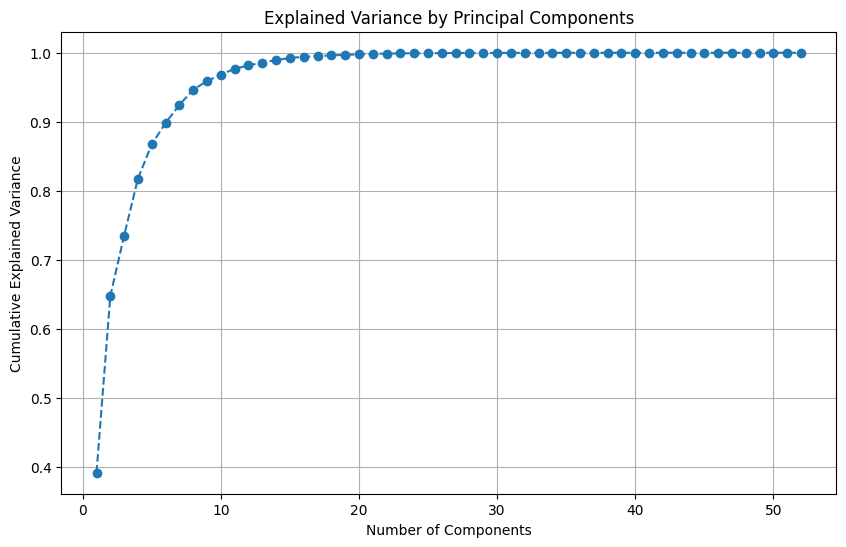

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols_with_missing])

# Apply PCA
pca = PCA()
principal_components = pca.fit(scaled_data)

# Plot the explained variance by each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(principal_components.explained_variance_ratio_) + 1), principal_components.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by Principal Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

The plot above shows the cumulative explained variance by the principal components.

As we move along the x-axis (representing the number of components), the y-axis gives us the total variance explained by the first
n components.

From the plot, we can observe:

A small number of principal components can explain a significant amount of the variance in the dataset.

The explained variance starts to plateau as we increase the number of components.

To decide on the number of components to retain, a common approach is to choose the number where the explained variance exceeds a certain threshold, say 95%.

In [ ]:
cumulative_variance = principal_components.explained_variance_ratio_.cumsum()
num_components_95 = (cumulative_variance < 0.95).sum() + 1
num_components_95

9

Nine principal components can explain at least 95% of the variance in the dataset.

Given this, we can now transform the data to these nine principal components.

This transformation will result in a reduced dataset with nine uncorrelated features, which can be beneficial for clustering and other analyses

In [ ]:
# Transform the data to the first nine principal components
pca = PCA(n_components=num_components_95)
reduced_data = pca.fit_transform(scaled_data)

# Convert the reduced data to a DataFrame for easier handling
df_reduced = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(num_components_95)])

# Display the first few rows of the reduced data
df_reduced.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-1.809909,-5.891822,-0.475262,0.391885,-0.869738,-0.025884,1.964964,-0.652621,-0.012195
1,-0.636767,-4.500508,-0.606532,0.135956,-0.417874,1.083128,0.823911,0.375820,-0.448134
2,-0.728862,-5.279204,-1.071781,0.578352,0.026980,-0.728910,1.158007,-0.164380,0.430501
3,-1.481580,-5.363828,-1.369396,0.580324,0.165327,0.867347,0.716403,0.492278,-0.113683
4,-1.430678,-5.250853,-1.268276,0.542020,-0.540773,-0.459714,0.679555,0.196235,0.330238


  # Step 5: Clustering
One common method to understand the structure and grouping in a dataset is clustering. The KMeans clustering algorithm is a popular choice for this. It partitions data into clusters, where each cluster has a centroid, and data points are assigned to the cluster whose centroid is closest.

Let's proceed with clustering the reduced dataset using the KMeans algorithm. To determine the optimal number of clusters, we can use the Elbow Method, where we plot the sum of squared distances (inertia) for different numbers of clusters and look for an "elbow" in the plot.

Let's compute the inertia for a range of cluster numbers and visualize it to determine the optimal number of clusters.​

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

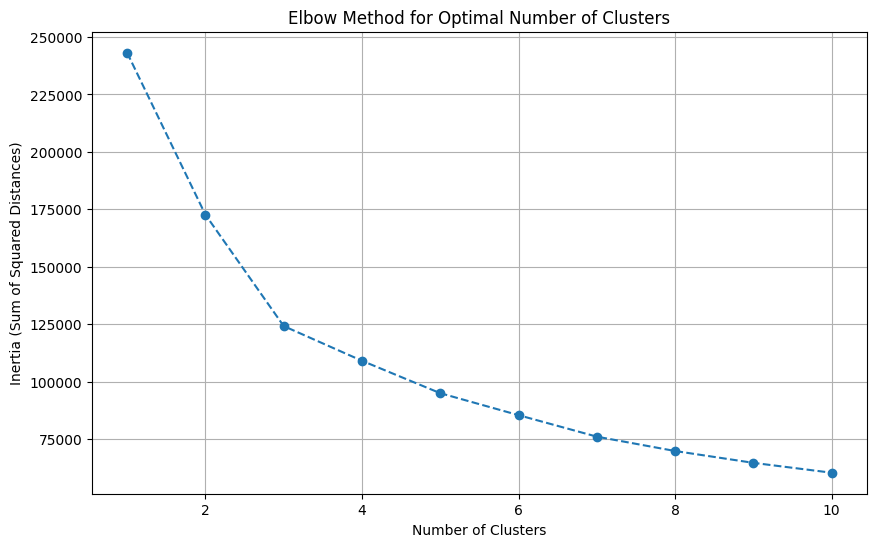

In [ ]:
inertia_values = []
cluster_range = range(1, 11)  # Checking for up to 10 clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_reduced)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.grid(True)
plt.show()

In [ ]:
# Apply KMeans clustering
optimal_clusters = 3  # Assuming 3 as an example. You can choose based on the elbow method.
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df_reduced['cluster'] = kmeans.fit_predict(df_reduced)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


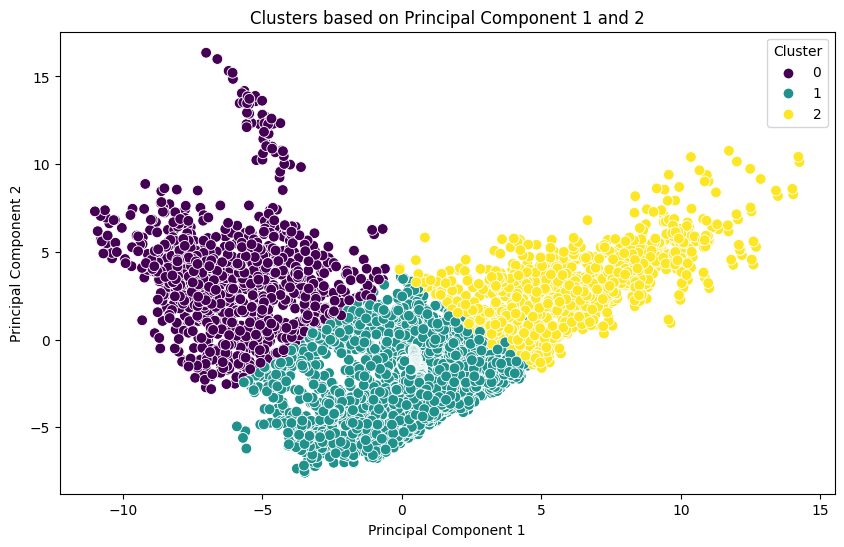

In [ ]:
# Assuming you've already clustered the data into 'cluster' column as provided earlier
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_reduced['PC1'], y=df_reduced['PC2'], hue=df_reduced['cluster'], palette='viridis', s=60)
plt.title('Clusters based on Principal Component 1 and 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


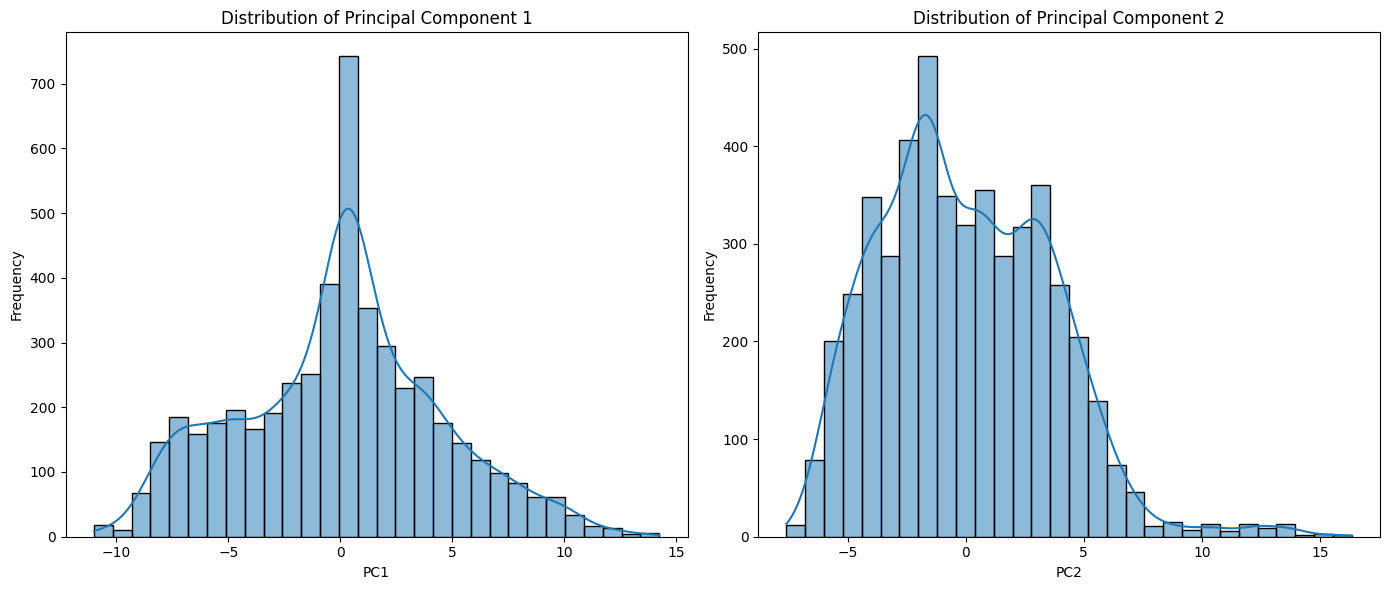

In [ ]:
# Plot the distribution of the first two principal components

plt.figure(figsize=(14, 6))

# Plot for PC1
plt.subplot(1, 2, 1)
sns.histplot(df_reduced['PC1'], bins=30, kde=True)
plt.title("Distribution of Principal Component 1")
plt.xlabel("PC1")
plt.ylabel("Frequency")

# Plot for PC2
plt.subplot(1, 2, 2)
sns.histplot(df_reduced['PC2'], bins=30, kde=True)
plt.title("Distribution of Principal Component 2")
plt.xlabel("PC2")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


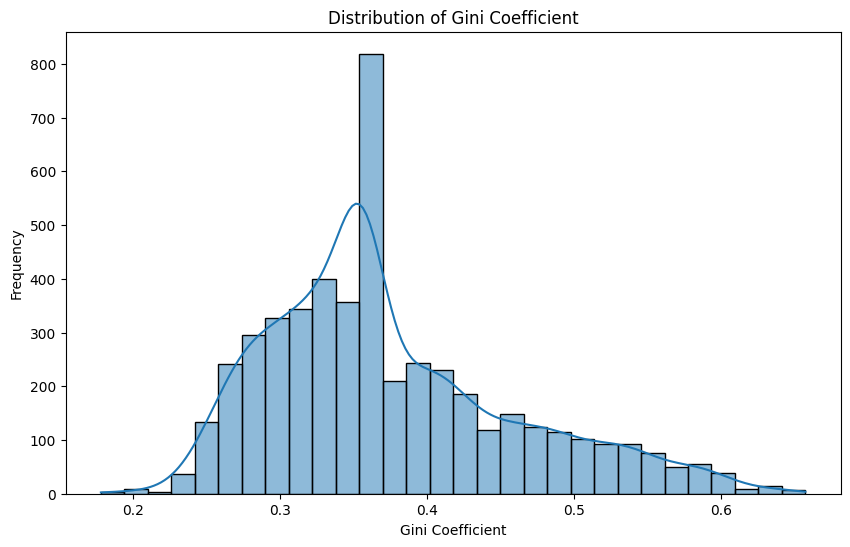

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['gini'], bins=30, kde=True)
plt.title('Distribution of Gini Coefficient')
plt.xlabel('Gini Coefficient')
plt.ylabel('Frequency')
plt.show()


  # Step 6: Anomaly Detection
Anomaly detection involves identifying unusual patterns that do not conform to expected behavior. These anomalies can be indicative of data errors or potentially interesting patterns. We can use statistical methods or machine learning models for this task.

One common method for anomaly detection is the Isolation Forest algorithm. It's particularly efficient for higher-dimensional datasets. The algorithm works by isolating anomalies rather than profiling normal data points.

In [ ]:
# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.05, random_state=0)  # Assuming 5% of the data might be anomalies
anomalies = iso_forest.fit_predict(df_reduced)

# Convert anomalies labels from [-1, 1] to [0, 1], where 1 indicates an anomaly
anomaly_labels = [1 if label == -1 else 0 for label in anomalies]

# Count the number of detected anomalies
num_anomalies = sum(anomaly_labels)
num_anomalies

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


244

### Steps to Remove Anomalies:
Detection: Use a suitable anomaly detection method, like the Isolation Forest, to label data points as normal or anomalies.

Verification: Before removing anomalies, it's essential to verify them. It's possible that what's labeled as an "anomaly" might be a genuine data point of interest. Manual verification, domain knowledge, or further analyses can be used to confirm if a detected anomaly should indeed be removed.

Removal: Once confirmed, anomalies can be removed from the dataset to prevent them from influencing subsequent analyses.

In [ ]:
# Adding the anomaly labels to the DataFrame
df['anomaly'] = anomaly_labels

# Removal
# Once verified, we can filter out the anomalies from the DataFrame.
df_cleaned = df[df['anomaly'] == 0].drop(columns=['anomaly'])

# df_cleaned now holds the data without the anomalies.


  # Step 7: Additional EDA Visualizations
To gain more insights from the data, we can create more visualizations:

Anomaly Visualization: We can plot the first two principal components and highlight the detected anomalies.

Boxplots: Boxplots can help visualize the distribution of some of the original features, indicating median, quartiles, and potential outliers.

Histograms: Histograms can provide insights into the distribution of various features.

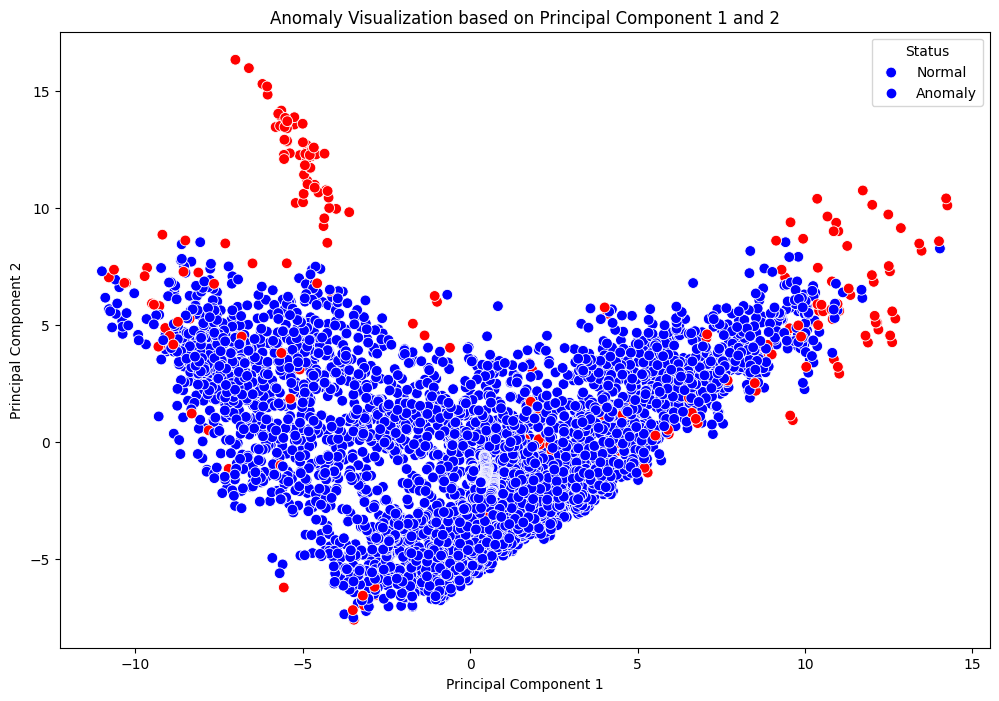

In [ ]:
# Anomaly Visualization using the first two principal components
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_reduced['PC1'], y=df_reduced['PC2'], hue=anomaly_labels, palette={0: 'blue', 1: 'red'}, s=60)
plt.title('Anomaly Visualization based on Principal Component 1 and 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Status', labels=['Normal', 'Anomaly'])
plt.show()


Here's the anomaly visualization based on the first two principal components:

* Blue points represent normal data points.
* Red points represent the detected anomalies.

From the plot, we can see that the anomalies tend to lie on the outskirts of the data distribution, which is expected.

Next, let's visualize the distribution of some of the original features, like the gini coefficient, using a boxplot. This will help us understand its spread, median, and potential outliers.​

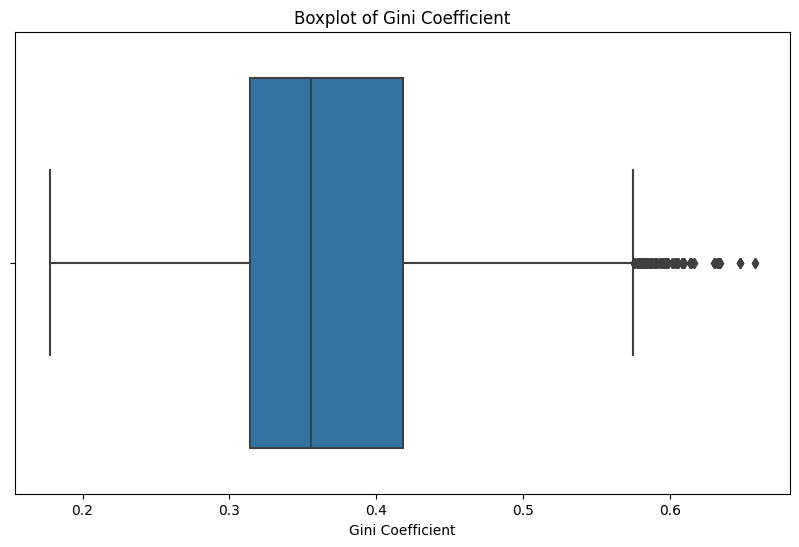

In [ ]:
# Boxplot for the 'gini' coefficient
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['gini'])
plt.title('Boxplot of Gini Coefficient')
plt.xlabel('Gini Coefficient')
plt.show()


The boxplot provides a visual representation of the distribution of the gini coefficient:

The central line inside the box represents the median.

The edges of the box are the 25th and 75th percentiles (Q1 and Q3).
The whiskers extend to values within 1.5 times the interquartile range (IQR) from Q1 and Q3. Points outside the whiskers are potential outliers.

From the plot, we can observe that most countries have a Gini coefficient ranging between approximately 25 and 50. There are also a few potential outliers on both the lower and higher ends.

For a more detailed distribution view, we can visualize the histogram of another feature, like the headcount_ratio_international_povline, which indicates the percentage of the population living below the international poverty line.​

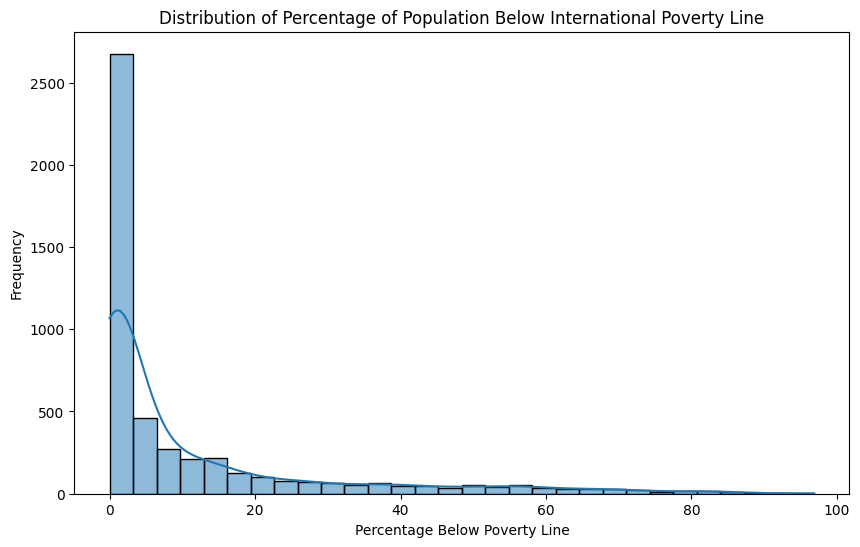

In [ ]:
# Histogram for the 'headcount_ratio_international_povline'
plt.figure(figsize=(10, 6))
sns.histplot(df['headcount_ratio_international_povline'], bins=30, kde=True)
plt.title('Distribution of Percentage of Population Below International Poverty Line')
plt.xlabel('Percentage Below Poverty Line')
plt.ylabel('Frequency')
plt.show()


The histogram provides insights into the distribution of the percentage of the population living below the international poverty line:

A significant portion of the data points (countries or years) have a low percentage of their population below the international poverty line.

However, there are also data points where a sizable fraction of the population is living below the poverty line.

  # Step 8: Modeling

In [ ]:
# One-Hot Encoding for Categorical Features
categorical_features = df_cleaned.select_dtypes(include=['object']).columns.tolist()  # Selecting all string/object columns
df_encoded = pd.get_dummies(df, columns=categorical_features)

In [ ]:
# Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Preparing the data
X = df_encoded.drop(columns=['gini'])  # Assuming 'country' is non-numeric and should be dropped
y = df_encoded['gini']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=0)
}

# Train and evaluate each model
best_model = None
lowest_mse = float('inf')

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse}")

    # Determine the best model
    if mse < lowest_mse:
        lowest_mse = mse
        best_model = name

print(f"Best Model: {best_model} with MSE: {lowest_mse}")


Linear Regression MSE: 0.00013059538112251276
Decision Tree MSE: 1.200599263224899e-06
Random Forest MSE: 8.043242690971546e-07
Best Model: Random Forest with MSE: 8.043242690971546e-07


  # Step 9: Entire process with Auto DS
  Automating the entire data science process (AutoDS) can significantly speed up the workflow. Several libraries allow for this, such as pandas-profiling for AutoEDA and TPOT for AutoDS.

Here's an overview of the steps we'll cover using automation:

* AutoDS with TPOT: This automates the entire machine learning pipeline, from feature preprocessing to model selection and hyperparameter tuning.

In [ ]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 972.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=2fb0d99884421d2d6e15244b998b83d6f9c2d1b73b97be5cc8c8ebe8963576e1
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [ ]:
# Importing necessary libraries
import pandas as pd

from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/gdrive/MyDrive/DataMining/World_poverty.csv')

# Preparing the data
df = df.dropna(subset=['gini'])
categorical_features = df.select_dtypes(include=['object']).columns.tolist()  # Selecting all string/object columns
df_encoded = pd.get_dummies(df, columns=categorical_features)

X = df_encoded.drop(columns=['gini'])
y = df_encoded['gini']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a TPOT regressor object
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=0)

# Fit the regressor to the training data
tpot.fit(X_train, y_train)

# Print the final pipeline
print(tpot.fitted_pipeline_)

# Export the pipeline as a Python script
tpot.export('tpot_best_pipeline.py')


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -4.1689302571722306e-06

Generation 2 - Current best internal CV score: -4.1689302571722306e-06

Generation 3 - Current best internal CV score: -4.1689302571722306e-06

Generation 4 - Current best internal CV score: -3.9361192781176115e-06

Generation 5 - Current best internal CV score: -3.9361192781176115e-06

Best pipeline: RandomForestRegressor(RandomForestRegressor(input_matrix, bootstrap=False, max_features=0.5, min_samples_leaf=1, min_samples_split=2, n_estimators=100), bootstrap=False, max_features=0.8500000000000001, min_samples_leaf=6, min_samples_split=12, n_estimators=100)
Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=RandomForestRegressor(bootstrap=False,
                                                                   max_features=0.5,
                                                                   random_state=0))),
                ('randomforestregressor',
                 RandomFor